# Trabalho de Multimídia - Template Matching

## Alunos:
- Igor Rufino Ribeiro – 1400 (turma L1)
- Gustavo Henrique da Silva Prado – 1403 (turma L1)
- Paulo Gabriel de Freitas Rotundaro – 1404 (turma L2)


## Conceitos

*Template Matching* é uma técnica no processamento de imagens digitais para encontrar pequenas partes de uma imagem que correspondam a uma imagem de modelo.

Ele pode ser usado na fabricação como parte do controle de qualidade, reconhecimento de rosto, uma maneira de navegar em um robô móvel, ou como uma maneira de detectar bordas nas imagens, entre várias outras aplicações.

## OpenCV

OpenCV (*Open Source Computer Vision Library*) é uma biblioteca de software de visão computacional e aprendizado de máquina de código aberto. 

O OpenCV foi desenvolvido para fornecer uma infraestrutura comum para aplicativos de visão computacional e acelerar o uso da percepção da máquina nos produtos comerciais. Por ser um produto licenciado pela BSD, o OpenCV facilita para as empresas a utilização e modificação do código.


O OpenCV fornece 6 métodos de *Template Matching* diferentes, como será visto a seguir.

## Funcionamento

Para relizar um *Template Matching*, precisamos de duas componentes:

- **Imagem de origem (I):** a imagem na qual esperamos encontrar uma correspondência com a imagem do modelo;
- **Imagem do modelo (T):** a imagem amostral que será comparada à imagem do modelo.

O objetivo do algoritmo é identificar a região com maior correspondência:

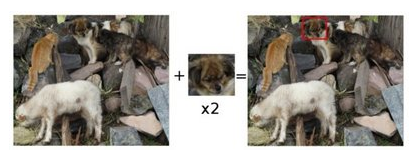

Para identificar a área correspondente, precisamos comparar a imagem do modelo com a imagem de origem, "deslizando-a" nos eixos **X** e **Y** da imagem:

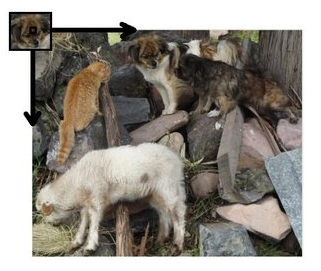

Ao deslizar, queremos dizer mover a amostra um pixel de cada vez (da esquerda para a direita, de cima para baixo). Em cada local, uma métrica é calculada para representar quão "boa" ou "ruim" é a correspondência nesse local (ou quão semelhante o patch é àquela área específica da imagem de origem).

Para cada localidade de **T** sobre **I**, você armazena a métrica na matriz de resultados **(R)**. Cada local **(x, y)** em **R** contém a métrica de correspondência:

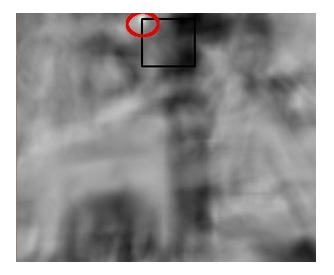

A imagem acima é o resultado **R** do deslizamento do patch com uma métrica **TM_CCORR_NORMED**. Os locais mais brilhantes indicam as correspondências mais altas. Como você pode ver, o local marcado pelo círculo vermelho é provavelmente aquele com o valor mais alto, de modo que o local (o retângulo formado por esse ponto como um canto, a largura e a altura iguais à imagem da amostra) é considerado a correspondência.

Na prática, ao trabalhar com o OpenVC, utilziamos a função **minMaxLoc** para localizar o valor mais alto (ou mais baixo, dependendo do tipo de método de correspondência) na matriz **R**.

A seguir estão as operações que cada método de *Template Matching* do OpenVC utiliza:

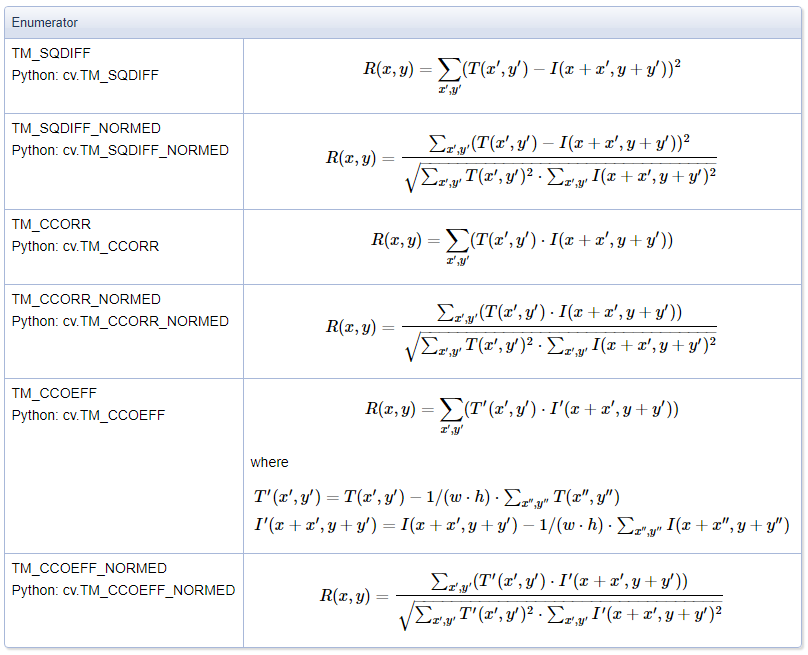

## CV_TM_SQDIFF - Soma das diferenças quadradas (ou SSD):

Distância euclidiana simples (ao quadrado):
- Pegue cada par de pixels e subtraia
- Quadrado a diferença
- Soma todos os quadrados

## CV_TM_SQDIFF_NORMED - SSD normalizado

Esse método raramente é usado na prática, mas a parte de normalização é semelhante nos próximos métodos.

O termo do nominador é o mesmo que o do método acima (**CV_TM_SQDIFF**), mas dividido por um fator calculado a partir da raiz quadrada do produto de:
- soma do modelo, ao quadrado
- soma da janela da imagem, ao quadrado

## CV_TM_CCORR - Correlação cruzada

Produto escalar entre as coordenadas de T e I:

- Pegue cada par de pixels e multiplique
- Soma todos os produtos

## CV_TM_CCORR_NORMED - Correlação cruzada normalizada

O termo do nominador é o mesmo que o do método acima (**CV_TM_CCORR**), mas dividido por um fator normalizador (igual visto no método **CV_TM_SQDIFF_NORMED**) calculado a partir da raiz quadrada do produto de:
- soma do modelo, ao quadrado
- soma da janela da imagem, ao quadrado

## CV_TM_CCOEFF - Coeficiente de correlação

Semelhante à correlação cruzada, mas normalizada com suas covariâncias

## CV_TM_CCOEFF_NORMED - Coeficiente de correlação normalizado

Coeficiente cruzado dividido por um fator normalizador (como visto anteriormente), calculado a partir da raiz quadrada do produto de:
- soma do modelo, ao quadrado
- soma da janela da imagem, ao quadrado

**Observações:**
- Os cálculos **normalizados** retornam valores de 0 a 1, enquanto as versões normais dos algoritmos retornam valores muito grandes.
- **SQDIFF** é um cálculo baseado em diferença que fornece um 0 em uma correspondência perfeita. Os outros dois (**CCORR** e **CCOEFF**) são baseados em correlação e retornam 1 para uma correspondência perfeita.

## Demostração

Importação da biblioteca do OpenCV para podermos utilizar seus métodos de Template Matching.

Para instalação do módulo, basta executar o comando: pip install opencv-python

In [1]:
import cv2 as cv

Importação do módulo numpy, para manuzeio das imagens, e do módulo Matplotlib é utilizada para exibir imagens dos resultados.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

Inicializando a imagem modelo ("einstein_face.jgp") e a imgem onde o código deverá buscar pelo modelo ("eistein.jpg").

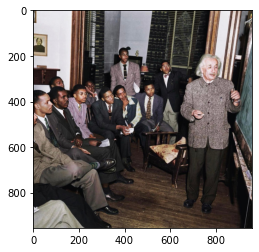

In [3]:
img_rgb = cv.imread('einstein.jpg')
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

# Como o OpenCV trabalha a imagem no padrão BGR, e o pyplot trabalha em RGB, devemos fazer uma conversão
img_rgb = cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

template = cv.imread('einstein_face.jpg',0)
w, h = template.shape[::-1]

Lista dos 6 métodos do OpenCV para comparação.

In [4]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

Cálculo e exibição dos resultados de cada método utilizado.

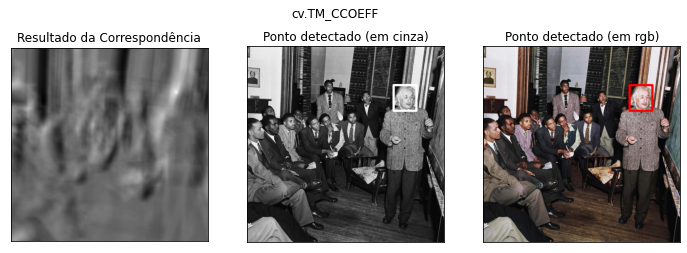

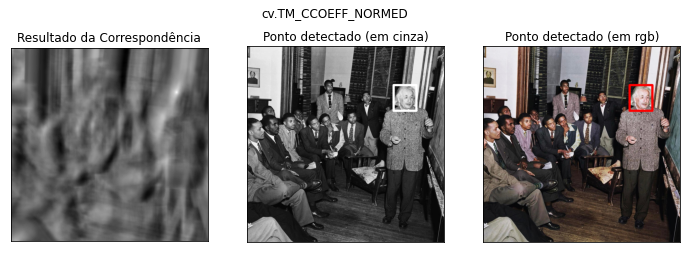

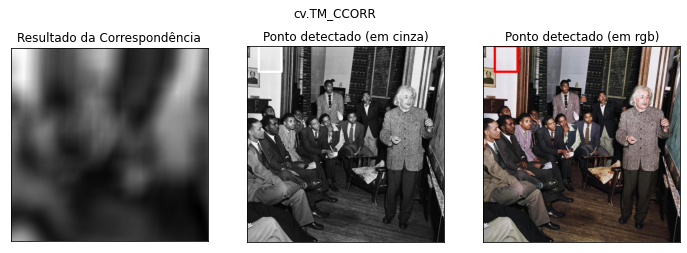

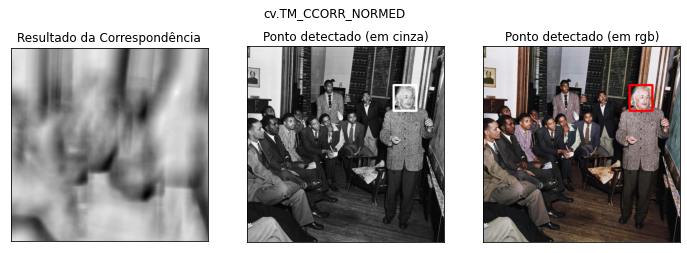

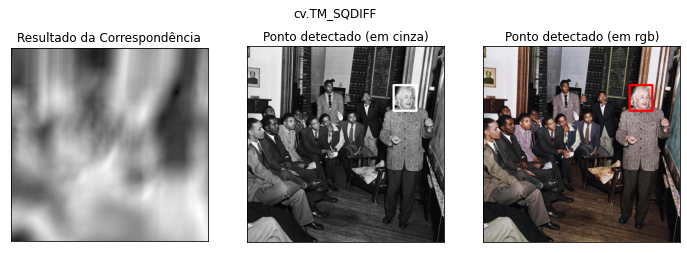

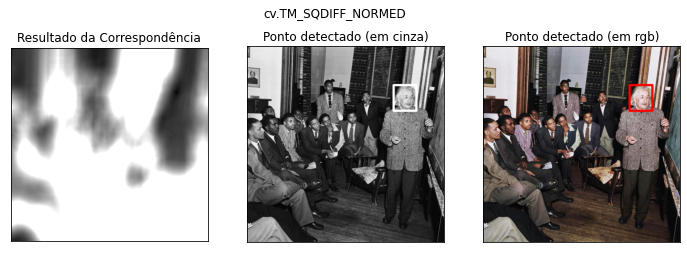

In [5]:
for meth in methods:
    img1 = img_rgb.copy()
    img2 = img_gray.copy()
    method = eval(meth)
    
    
    # Aplica o método de template matching "meth" da lista de métodos
    res = cv.matchTemplate(img2,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    
    # Se o método for "Soma das diferenças quadradas" (TM_SQDIFF ou TM_SQDIFF_NORMED), é pego o menor valor
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    
    # Adiciona um retângulo para indicar o resultado
    cv.rectangle(img1,top_left, bottom_right, (255,0,0), 10)
    cv.rectangle(img2,top_left, bottom_right, (255,0,0), 10)
    
    
    # Apresenta o resultado
    plt.figure(figsize=(12,4))
    plt.subplot(131),plt.imshow(res,cmap = 'gray')
    plt.title('Resultado da Correspondência'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(img2,cmap = 'gray')
    plt.title('Ponto detectado (em cinza)'), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(img1)
    plt.title('Ponto detectado (em rgb)'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

Todos os métodos apresentaram resultados satisfatórios, execeto o método **CV_TM_CCORR**, que por se tratar de um produto escalar, resultou em um valor muito alto ao comparar com a parede branca da imagem, indicando uma sensibilidade com a luz da imagem.

# Template Matching com multiplos objetos

Na seção anterior, pesquisamos na imagem o rosto de Einstein, que ocorre apenas uma vez na imagem. 

Suponha que você esteja procurando um objeto com várias ocorrências, **cv.minMaxLoc()** não fornecerá todos os locais. Nesse caso, usaremos *thresholding*. Portanto, neste exemplo, usaremos uma captura de tela do jogo Mario e encontraremos as moedas nele.

In [6]:
img_rgb = cv.imread('mario.jpg')

img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('coin.jpg',0)

img_rgb = cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB)

w, h = template.shape[::-1]

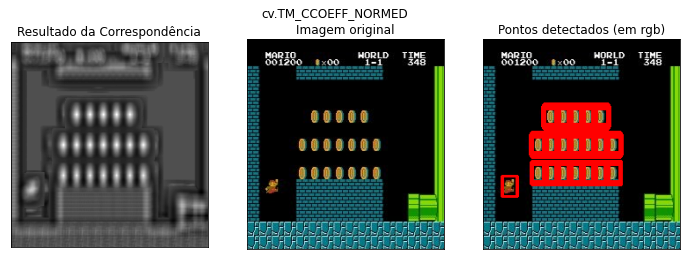

In [7]:
# Aplica o método de template matching "TM_CCOEFF_NORMED"
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)


# Localiza os pontos onde o resultado esteja acima de 0.65
threshold = 0.65
loc = np.where( res >= threshold)


# Adiciona um retângulo numa cópia da imagem original para indicar o resultado
img1 = img_rgb.copy()
for pt in zip(*loc[::-1]):
    cv.rectangle(img1, pt, (pt[0] + w, pt[1] + h), (255,0,0), 2)


# Apresenta o resultado
plt.figure(figsize=(12,4))
plt.subplot(131),plt.imshow(res,cmap = 'gray')
plt.title('Resultado da Correspondência'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_rgb,cmap = 'gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img1)
plt.title('Pontos detectados (em rgb)'), plt.xticks([]), plt.yticks([])
plt.suptitle('cv.TM_CCOEFF_NORMED')
plt.show()

Como pode ser observado na imagem "Resultado da Correspondência", o próprio Mario obteve valores altos o suficiente para poder ser considerado uma moeda. Para arrumar esse problema, temos que ajustar o valor de threshold para a nossa aplicação específica, para que apenas as medas sejam reconhecidas.

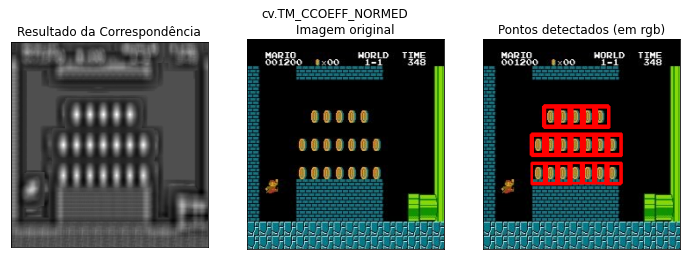

In [8]:
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8 # Alterando o valor de threshold para 0.8
loc = np.where( res >= threshold)

img1 = img_rgb.copy()
for pt in zip(*loc[::-1]):
    cv.rectangle(img1, pt, (pt[0] + w, pt[1] + h), (255,0,0), 2)

plt.figure(figsize=(12,4))
plt.subplot(131),plt.imshow(res,cmap = 'gray')
plt.title('Resultado da Correspondência'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_rgb,cmap = 'gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img1)
plt.title('Pontos detectados (em rgb)'), plt.xticks([]), plt.yticks([])
plt.suptitle('cv.TM_CCOEFF_NORMED')
plt.show()

Ao aumentarmos o valor do *threshold* de 0.65 para 0.8, o Mario deixou de ser considerado uma moeda.

# Desvantagens do Template  Matching do OpenCV

Algumas desvantagens de trabalhar com os métodos de *Template Matching* do OpenCV:

- É preciso saber com exatidão a imagem que se deseja procurar. Caso deseja-se trabalhar com recursos dinâmicos, é melhor o emprego de algumas outras técnicas.

- Os métodos de *Template Matching* do OpenCV não permitem verificar rotações e escalas. Se a imagem modelo (imagem da moeda ou a do rosto do Einstein, usados no nosso exemplo) fosse girado 90 graus, o programa atual nunca o encontraria. Nesse caso, umas das soluções seria implementar um código de força bruta para gerar todas as rotações possíveis, todas as escalas possíveis e, em seguida, fazer a correspondência. Mas isso seria extremamente custoso, recomendando-se o uso de outras técnicas.

- Apesar de serem métodos amplamente utilizados, com procedimentos de simplificados, são sensíveis a mudanças de luz e ruído da imagem (como pode ser notado na demonstração do método **CV_TM_CCORR**).

- Outros problemas: oclusão, alterações e desorganização de fundo.